In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data/bank.csv")

In [3]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
all_df=all_df[cols]

In [4]:
all_df['deposit']= all_df['deposit'].map({'no':0, 'yes': 1}).astype(int)

In [5]:
X=all_df.drop(['deposit'], axis=1).values.astype('float64')

In [6]:
Y = all_df['deposit'].values.astype('int64')

In [7]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

8929

In [8]:
test_Features[:2]

array([[-0.85890111, -0.3021573 , -1.26574556, -0.8008745 , -0.55416834,
        -0.48118405, -0.36325984],
       [ 0.14841574, -0.31455937,  0.51565047, -0.97372895, -0.18678537,
        -0.48118405, -0.36325984]])

In [9]:
train_Label[:4]

array([0, 1, 0, 1])

In [10]:
train_Features.shape

(8929, 7)

In [11]:
test_Label[:4]

array([0, 0, 0, 1])

In [12]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [13]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [15]:
model = Sequential()

In [16]:
model.add(LSTM(units=7, input_shape=(7,1)))

In [17]:
model.add(Dense(1, activation = "sigmoid"))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [20]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=500,verbose=1,callbacks=[early_stopping])

Train on 8036 samples, validate on 893 samples
Epoch 1/30
8036/8036 [==============================] - 3s 386us/step - loss: 0.7009 - acc: 0.3937 - val_loss: 0.6978 - val_acc: 0.3863
Epoch 2/30
8036/8036 [==============================] - 1s 99us/step - loss: 0.6955 - acc: 0.4710 - val_loss: 0.6919 - val_acc: 0.5689
Epoch 3/30
8036/8036 [==============================] - 1s 100us/step - loss: 0.6908 - acc: 0.5645 - val_loss: 0.6865 - val_acc: 0.5857
Epoch 4/30
8036/8036 [==============================] - 1s 99us/step - loss: 0.6862 - acc: 0.5763 - val_loss: 0.6817 - val_acc: 0.5991
Epoch 5/30
8036/8036 [==============================] - 1s 108us/step - loss: 0.6820 - acc: 0.5892 - val_loss: 0.6768 - val_acc: 0.6114
Epoch 6/30
8036/8036 [==============================] - 1s 106us/step - loss: 0.6777 - acc: 0.6013 - val_loss: 0.6725 - val_acc: 0.6148
Epoch 7/30
8036/8036 [==============================] - 1s 103us/step - loss: 0.6734 - acc: 0.6052 - val_loss: 0.6677 - val_acc: 0.6181
Epo

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

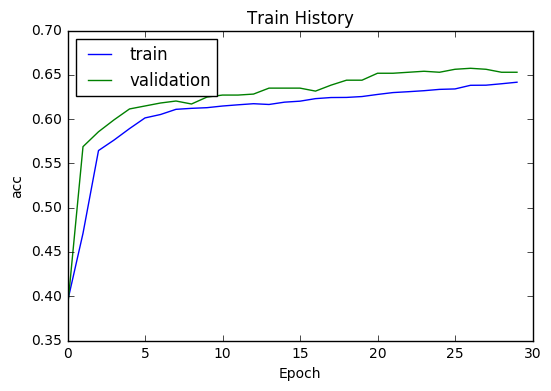

In [22]:
show_train_history(train_history,'acc','val_acc')

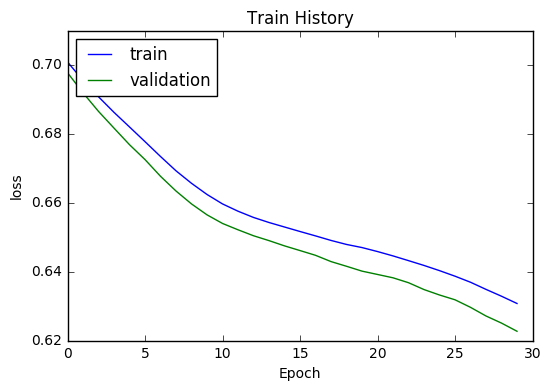

In [23]:
show_train_history(train_history,'loss','val_loss')

In [24]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 61us/step


In [25]:
scores[1]

0.6399462609028421